### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from scipy.stats import shapiro
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Import data

In [2]:
data = pd.read_csv('BankChurners.csv')
df = data[data.columns[:-2]] #ignore last two columns
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
def missing_values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)
                            

In [4]:
missing_values(df)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,CLIENTNUM,10127,0,0.0,int64,"[768805383, 818770008, 713982108, 769911858, 7...",10127
11,Months_Inactive_12_mon,10127,0,0.0,int64,"[1, 4, 2, 3, 6, 0, 5]",7
19,Total_Ct_Chng_Q4_Q1,10127,0,0.0,float64,"[1.625, 3.714, 2.333, 2.5, 0.846, 0.722, 0.714...",830
18,Total_Trans_Ct,10127,0,0.0,int64,"[42, 33, 20, 28, 24, 31, 36, 32, 26, 17, 29, 2...",126
17,Total_Trans_Amt,10127,0,0.0,int64,"[1144, 1291, 1887, 1171, 816, 1088, 1330, 1538...",5033
16,Total_Amt_Chng_Q4_Q1,10127,0,0.0,float64,"[1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.9...",1158
15,Avg_Open_To_Buy,10127,0,0.0,float64,"[11914.0, 7392.0, 3418.0, 796.0, 4716.0, 2763....",6813
14,Total_Revolving_Bal,10127,0,0.0,int64,"[777, 864, 0, 2517, 1247, 2264, 1396, 1677, 14...",1974
13,Credit_Limit,10127,0,0.0,float64,"[12691.0, 8256.0, 3418.0, 3313.0, 4716.0, 4010...",6205
12,Contacts_Count_12_mon,10127,0,0.0,int64,"[3, 2, 0, 1, 4, 5, 6]",7


In [5]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [6]:
df['Income_Category'].replace({'$60K - $80K': "60k_80k", 'Less than $40K': "0_40k", '$80K - $120K': "80k_120k",
                                        '$40K - $60K': "40k_60k", "$120K +": "120k_plus"}, inplace = True)
df.drop("CLIENTNUM", axis = 1, inplace = True)

C:\Users\Shaokat\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\Shaokat\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df['Income_Category'].unique()

array(['60k_80k', '0_40k', '80k_120k', '40k_60k', '120k_plus', 'Unknown'],
      dtype=object)

### Visualizaiton

In [8]:
df.groupby("Attrition_Flag").size()

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
dtype: int64

<AxesSubplot:ylabel='None'>

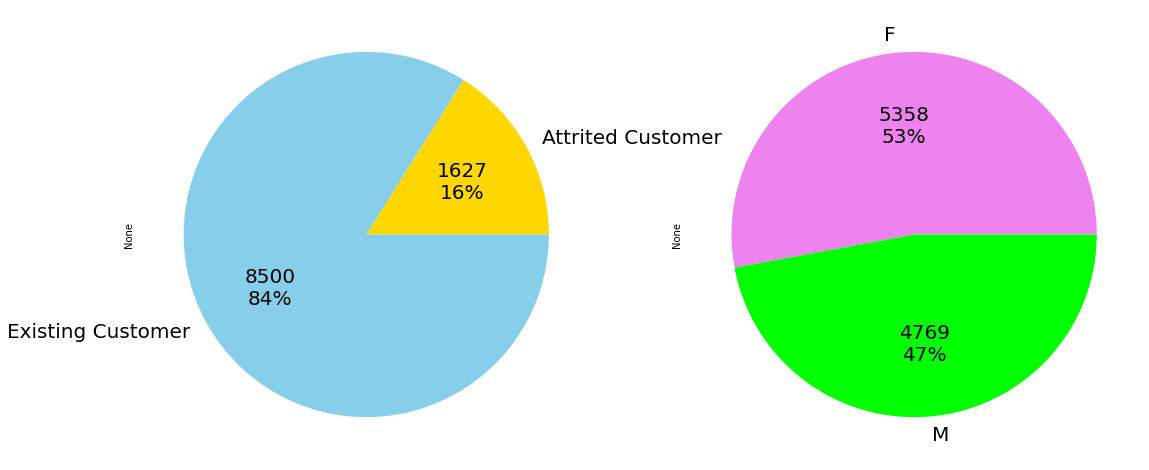

In [9]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 10))
df.groupby("Attrition_Flag").size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['gold', 'skyblue'],ax=ax1)

df.groupby("Gender").size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['violet', 'lime'],ax=ax2)

Text(0.5, 1.0, 'CARD CATEGORY & ATTRITION FLAG')

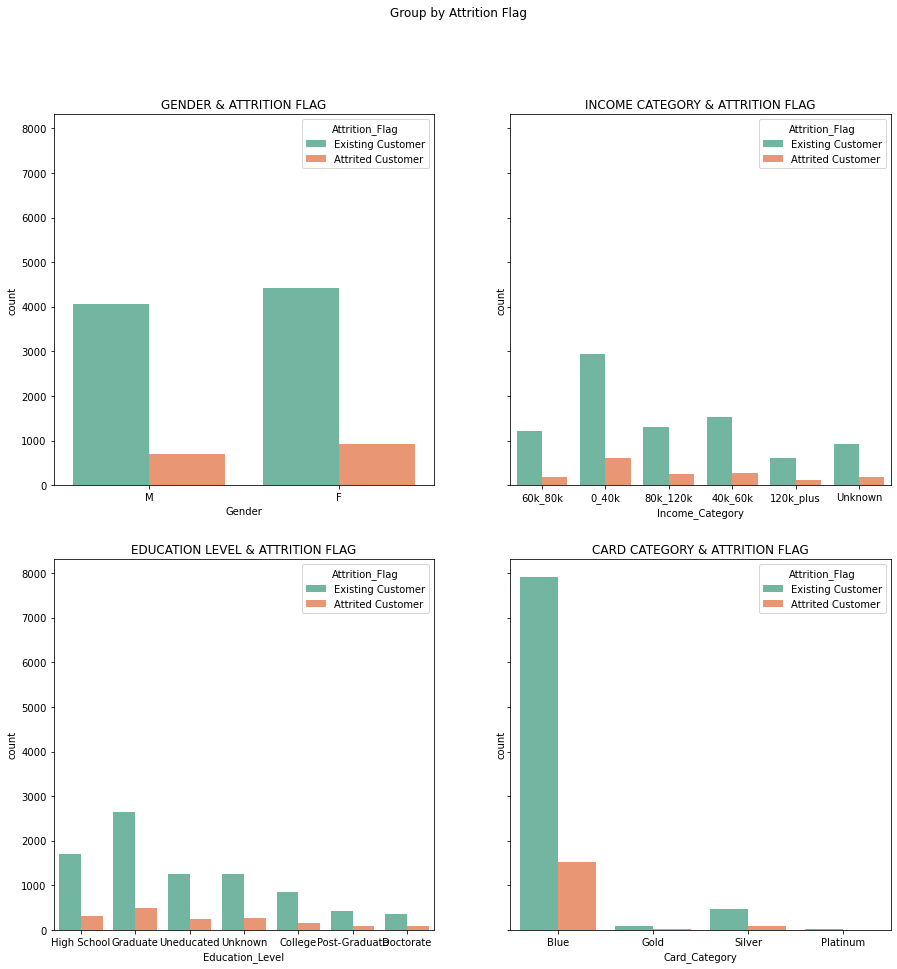

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Group by Attrition Flag')
sns.countplot(x="Gender", hue = "Attrition_Flag",  data=df, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("GENDER & ATTRITION FLAG")

sns.countplot(x="Income_Category", hue = "Attrition_Flag",  data=df, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("INCOME CATEGORY & ATTRITION FLAG")

sns.countplot(x="Education_Level", hue = "Attrition_Flag",  data=df, ax=axes[1,0], palette="Set2")
axes[1,0].set_title("EDUCATION LEVEL & ATTRITION FLAG")

sns.countplot(x="Card_Category", hue = "Attrition_Flag",  data=df, ax=axes[1,1], palette="Set2")
axes[1,1].set_title("CARD CATEGORY & ATTRITION FLAG")


<AxesSubplot:ylabel='Total_Ct_Chng_Q4_Q1'>

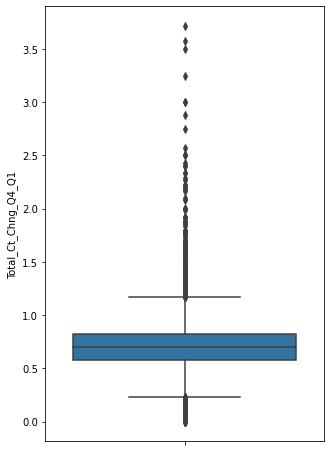

In [11]:
fig = plt.subplots(figsize = (5,8))
sns.boxplot(y=df["Total_Ct_Chng_Q4_Q1"])

<AxesSubplot:ylabel='Total_Trans_Ct'>

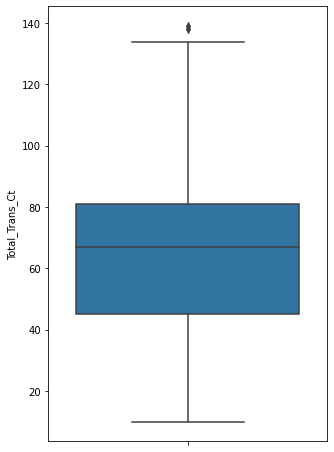

In [12]:
fig = plt.subplots(figsize = (5,8))
sns.boxplot(y=df["Total_Trans_Ct"])

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

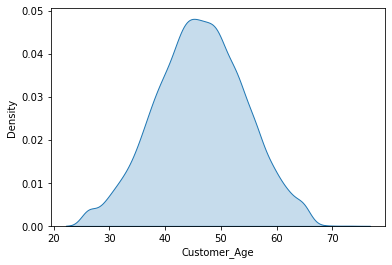

In [13]:
sns.kdeplot(df['Customer_Age'], shade = True)

### Outlier cleanup

In [14]:
columns = ["Customer_Age", 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for column_name in columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1 - 3 * IQR)) |(df[column_name] > (Q3 + 3 * IQR)))]

In [15]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,Existing Customer,44,M,2,Graduate,Married,40k_60k,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
9,Existing Customer,48,M,2,Graduate,Single,80k_120k,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
10,Existing Customer,42,M,5,Uneducated,Unknown,120k_plus,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
11,Existing Customer,65,M,1,Unknown,Married,40k_60k,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
14,Existing Customer,57,F,2,Graduate,Married,0_40k,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,Attrited Customer,41,M,2,Unknown,Divorced,40k_60k,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,0_40k,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,40k_60k,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


There were 10127 row observations before outlier cleanup. We currently have 9240 number of row

### Normality test

In [16]:
def shapiro_wilk_test(data):
    columns = df.columns
    int_columns = []
    normality_column_name = []
    normality_statistic = []
    normality_result = []
    for column_type in columns:
        if df[column_type].dtypes == "int64" or df[column_type].dtypes == "float64":
            int_columns.append(column_type)
    for column in int_columns:
        stat, p = shapiro(data[column])
        statistic = ('Statistics=%.3f, p=%.3f' % (stat, p))
        #print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            normality_column_name.append(column)
            normality_statistic.append(statistic)
            normality.append("Sample looks Gaussian")
                    
        else:
            normality_column_name.append(column)
            normality_statistic.append(statistic)
            normality_result.append("Sample does not look Gaussian")
        
    normality_column_name = pd.DataFrame(normality_column_name, columns =['Column Name'])
    normality_statistic = pd.DataFrame(normality_statistic, columns =['Statistic']) 
    normality_result = pd.DataFrame(normality_result, columns =['Result']) 


    result = pd.concat([normality_column_name, normality_statistic, normality_result], axis=1, sort=False)
    
    return result 

In [17]:
shapiro_wilk_test(df)

C:\Users\Shaokat\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column Name,Statistic,Result
0,Customer_Age,"Statistics=0.996, p=0.000",Sample does not look Gaussian
1,Dependent_count,"Statistics=0.937, p=0.000",Sample does not look Gaussian
2,Months_on_book,"Statistics=0.977, p=0.000",Sample does not look Gaussian
3,Total_Relationship_Count,"Statistics=0.918, p=0.000",Sample does not look Gaussian
4,Months_Inactive_12_mon,"Statistics=0.870, p=0.000",Sample does not look Gaussian
5,Contacts_Count_12_mon,"Statistics=0.929, p=0.000",Sample does not look Gaussian
6,Credit_Limit,"Statistics=0.729, p=0.000",Sample does not look Gaussian
7,Total_Revolving_Bal,"Statistics=0.913, p=0.000",Sample does not look Gaussian
8,Avg_Open_To_Buy,"Statistics=0.731, p=0.000",Sample does not look Gaussian
9,Total_Amt_Chng_Q4_Q1,"Statistics=0.977, p=0.000",Sample does not look Gaussian


<AxesSubplot:>

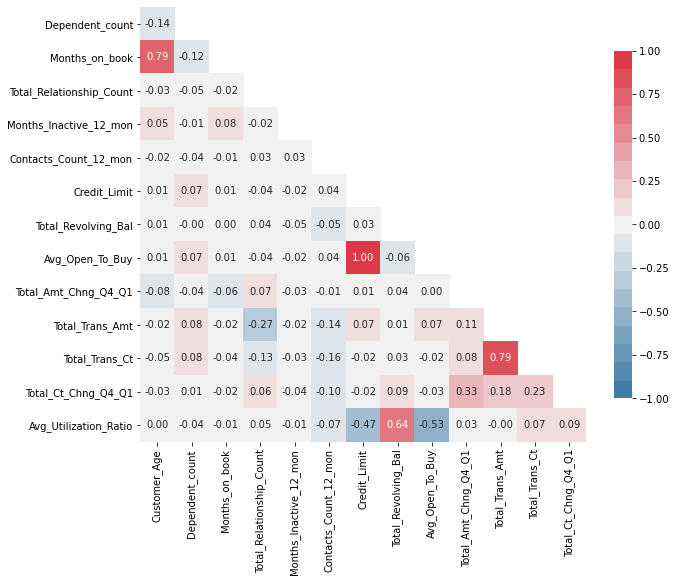

In [18]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', cmap = sns.diverging_palette(240,10, n= 19),
           vmin = -1, vmax = 1, cbar_kws = {'shrink': .8})


In [19]:
df_corr

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.136004,0.788916,-0.025209,0.054938,-0.022454,0.008354,0.014385,0.007006,-0.080757,-0.018256,-0.051479,-0.025104,0.002194
Dependent_count,-0.136004,1.000000,-0.116469,-0.051141,-0.007906,-0.041424,0.069494,-0.002393,0.069625,-0.035880,0.078436,0.076306,0.013852,-0.036508
Months_on_book,0.788916,-0.116469,1.000000,-0.019537,0.076159,-0.011446,0.011240,0.002865,0.010959,-0.061267,-0.019701,-0.041257,-0.023517,-0.012252
Total_Relationship_Count,-0.025209,-0.051141,-0.019537,1.000000,-0.015326,0.029892,-0.035763,0.035234,-0.038989,0.066629,-0.267749,-0.128152,0.058001,0.048557
Months_Inactive_12_mon,0.054938,-0.007906,0.076159,-0.015326,1.000000,0.033364,-0.020138,-0.045842,-0.015852,-0.029241,-0.015162,-0.031610,-0.044142,-0.011994
Contacts_Count_12_mon,-0.022454,-0.041424,-0.011446,0.029892,0.033364,1.000000,0.036209,-0.054595,0.041233,-0.014624,-0.135434,-0.157873,-0.098018,-0.066467
Credit_Limit,0.008354,0.069494,0.011240,-0.035763,-0.020138,0.036209,1.000000,0.032231,0.995679,0.008470,0.072255,-0.015078,-0.024969,-0.472568
Total_Revolving_Bal,0.014385,-0.002393,0.002865,0.035234,-0.045842,-0.054595,0.032231,1.000000,-0.060719,0.042856,0.013125,0.030587,0.086461,0.641690
Avg_Open_To_Buy,0.007006,0.069625,0.010959,-0.038989,-0.015852,0.041233,0.995679,-0.060719,1.000000,0.004477,0.070939,-0.017900,-0.032969,-0.531558
Total_Amt_Chng_Q4_Q1,-0.080757,-0.035880,-0.061267,0.066629,-0.029241,-0.014624,0.008470,0.042856,0.004477,1.000000,0.108867,0.076133,0.326643,0.030932



There is high correlation between Avg Open To buy and Credit Limit

Credit_Limit = Credit Limit on the Credit Card

Avg_Open_To_Buy = Open to Buy Credit Line (Average of last 12 months)


#### Remove 'Credit LImit' 

In [20]:
df.drop('Credit_Limit', axis = 1, inplace = True)

In [21]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer':0})

In [22]:
df_dummies = pd.get_dummies(df)
df_dummies

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_0_40k,Income_Category_120k_plus,Income_Category_40k_60k,Income_Category_60k_80k,Income_Category_80k_120k,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
5,0,44,2,36,3,1,2,1247,2763.0,1.376,...,0,0,1,0,0,0,1,0,0,0
9,0,48,2,36,6,3,3,1677,9979.0,1.524,...,0,0,0,0,1,0,1,0,0,0
10,0,42,5,31,5,3,2,1467,5281.0,0.831,...,0,1,0,0,0,0,1,0,0,0
11,0,65,1,54,6,2,3,1587,7508.0,1.433,...,0,0,1,0,0,0,1,0,0,0
14,0,57,2,48,5,2,2,680,1756.0,1.190,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,1,55,3,47,4,3,3,2517,12140.0,0.166,...,0,0,0,0,0,1,1,0,0,0
10123,1,41,2,25,4,2,3,2186,2091.0,0.804,...,0,0,1,0,0,0,1,0,0,0
10124,1,44,1,36,5,3,4,0,5409.0,0.819,...,1,0,0,0,0,0,1,0,0,0
10125,1,30,2,36,4,3,3,0,5281.0,0.535,...,0,0,1,0,0,0,1,0,0,0


### Train - Validation - Test Split

In [23]:
X = df_dummies.drop('Attrition_Flag', axis = 1)
Y = df_dummies['Attrition_Flag']

In [24]:
X.shape

(9240, 36)

In [25]:
Y.shape

(9240,)

In [26]:
#Train - Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Train - Validation split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 42)

x_train_shape = X_train.shape
x_val_shape = X_val.shape
x_test_shape = X_test.shape

print(f"X_train shape = {x_train_shape} \nX_val shape = {x_val_shape}\nX_test shape = {x_test_shape}")

X_train shape = (5544, 36) 
X_val shape = (1848, 36)
X_test shape = (1848, 36)


In [27]:
unique, counts = np.unique(Y_val, return_counts=True)
dict(zip(unique, counts))

{0: 1512, 1: 336}

In [28]:
modelResult = []
modelName = []

def conf_matrx(y_test, y_pred, model):
    
    cm = confusion_matrix(y_test,y_pred)
    f, ax = plt.subplots(figsize = (5,5))
    sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red',fmt = '.0f', ax=ax)
    plt.xlabel('predicted y values')
    plt.ylabel('real y values')
    plt.title('\nConfusion Mtrix')
    plt.show()
    
def roc_auc_curve_plot(model_name, X_testt,Y_testt):
    ns_probs = [0 for _ in range(len(Y_testt))] # no skill probabilities
    model_probs = model_name.predict_proba(X_testt) #predict probabilites
    model_probs = model_probs[:, 1] # probabilities for the positive outcome only
    
    ns_auc = roc_auc_score(Y_testt, ns_probs)
    lr_auc = roc_auc_score(Y_testt, model_probs)
    
    print("NO Skill: ROC AUC=%.3f" %(ns_auc))
    print ('ROC AUC = %.3f' %(lr_auc))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_testt, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(Y_testt, model_probs)
    
    #plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle= '--', label='No Skill')
    plt.plot(model_fpr, model_tpr, marker='.', label = 'Model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show() 
def  ML_Algorithms(model, alg_name, x_trainn,  x_testt, y_trainn, y_testt):
        from sklearn.metrics import roc_auc_score, roc_curve
        
        modell = model()
        result_model = modell.fit(x_trainn, y_trainn)
        y_pred = result_model.predict(x_testt)
        conf_matrx(y_testt, y_pred, alg_name)
        print('*****', alg_name, " ALGORITHM:")
        
        modelResult.append(result_model)
        modelName.append(alg_name)
        
        print("classification_report\n", classification_report(y_testt, y_pred))
        print('Accuracy Score for ', alg_name, accuracy_score(y_testt, y_pred))
        
        y_probs = modell.predict_proba(x_testt)[:,1] # positive class prediction probabilities  
        y_pred = np.where(y_probs > 0.5, 1, 0)
        
        roc_auc_curve_plot(modell, x_testt, y_testt)
        
        

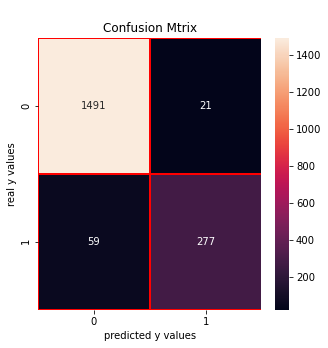

***** Random Forest Classifier  ALGORITHM:
classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1512
           1       0.93      0.82      0.87       336

    accuracy                           0.96      1848
   macro avg       0.95      0.91      0.92      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  Random Forest Classifier 0.9567099567099567
NO Skill: ROC AUC=0.500
ROC AUC = 0.989


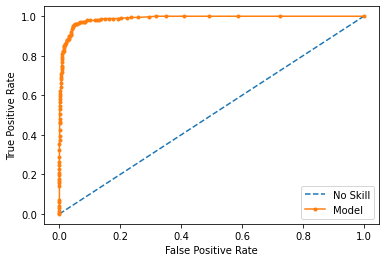

In [29]:
ML_Algorithms(RandomForestClassifier, "Random Forest Classifier", X_train, X_val, Y_train, Y_val)

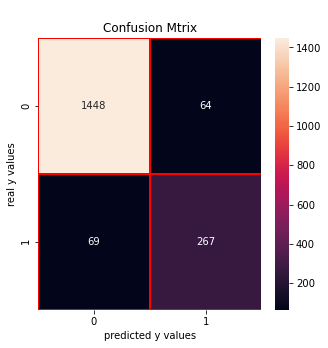

***** Decision Tree Classifier  ALGORITHM:
classification_report
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1512
           1       0.81      0.79      0.80       336

    accuracy                           0.93      1848
   macro avg       0.88      0.88      0.88      1848
weighted avg       0.93      0.93      0.93      1848

Accuracy Score for  Decision Tree Classifier 0.928030303030303
NO Skill: ROC AUC=0.500
ROC AUC = 0.876


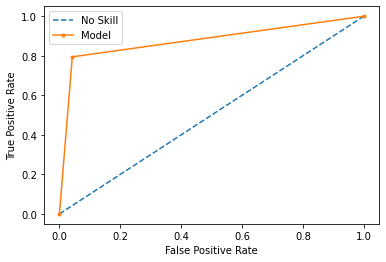

In [30]:
ML_Algorithms(DecisionTreeClassifier, "Decision Tree Classifier", X_train, X_val,  Y_train, Y_val)

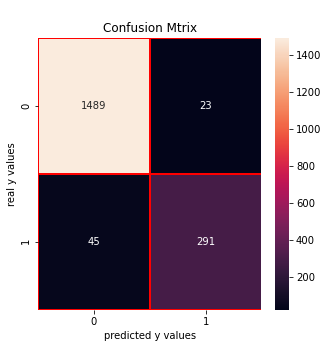

***** Gradient Boosting Classifier  ALGORITHM:
classification_report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1512
           1       0.93      0.87      0.90       336

    accuracy                           0.96      1848
   macro avg       0.95      0.93      0.94      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  Gradient Boosting Classifier 0.9632034632034632
NO Skill: ROC AUC=0.500
ROC AUC = 0.991


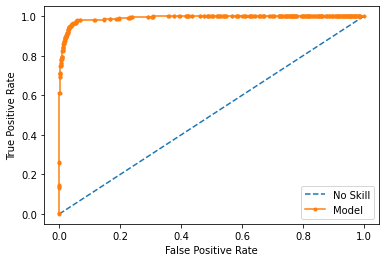

In [31]:
ML_Algorithms(GradientBoostingClassifier, "Gradient Boosting Classifier", X_train, X_val,  Y_train, Y_val)

C:\Users\Shaokat\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


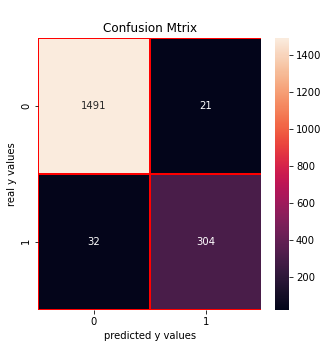

***** XGB Classifier  ALGORITHM:
classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.94      0.90      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.95      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  XGB Classifier 0.9713203463203464
NO Skill: ROC AUC=0.500
ROC AUC = 0.993


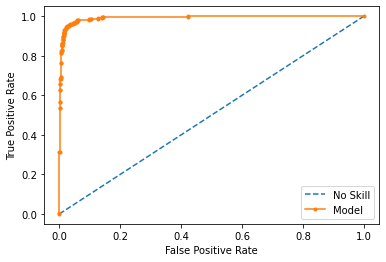

In [32]:
ML_Algorithms(XGBClassifier, "XGB Classifier", X_train, X_val,  Y_train, Y_val)

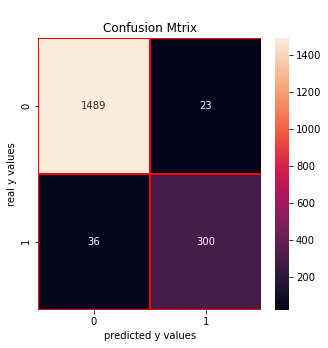

***** LGBM Classifier  ALGORITHM:
classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1512
           1       0.93      0.89      0.91       336

    accuracy                           0.97      1848
   macro avg       0.95      0.94      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  LGBM Classifier 0.9680735930735931
NO Skill: ROC AUC=0.500
ROC AUC = 0.993


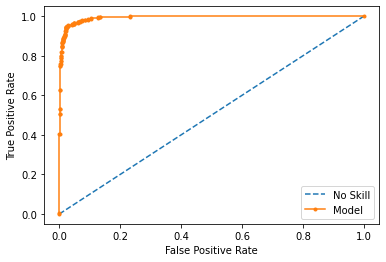

In [33]:
ML_Algorithms(LGBMClassifier, "LGBM Classifier", X_train, X_val,  Y_train, Y_val)

Learning rate set to 0.021407
0:	learn: 0.6666471	total: 157ms	remaining: 2m 36s
1:	learn: 0.6405367	total: 161ms	remaining: 1m 20s
2:	learn: 0.6154077	total: 165ms	remaining: 54.9s
3:	learn: 0.5904404	total: 171ms	remaining: 42.6s
4:	learn: 0.5663883	total: 179ms	remaining: 35.6s
5:	learn: 0.5467634	total: 184ms	remaining: 30.6s
6:	learn: 0.5282217	total: 189ms	remaining: 26.9s
7:	learn: 0.5050576	total: 194ms	remaining: 24s
8:	learn: 0.4842652	total: 199ms	remaining: 21.9s
9:	learn: 0.4689348	total: 203ms	remaining: 20.1s
10:	learn: 0.4563895	total: 208ms	remaining: 18.7s
11:	learn: 0.4413074	total: 213ms	remaining: 17.5s
12:	learn: 0.4243407	total: 217ms	remaining: 16.5s
13:	learn: 0.4093290	total: 221ms	remaining: 15.6s
14:	learn: 0.3967075	total: 225ms	remaining: 14.8s
15:	learn: 0.3878783	total: 230ms	remaining: 14.1s
16:	learn: 0.3780839	total: 234ms	remaining: 13.5s
17:	learn: 0.3689272	total: 239ms	remaining: 13s
18:	learn: 0.3591773	total: 243ms	remaining: 12.6s
19:	learn: 0.

174:	learn: 0.1110473	total: 853ms	remaining: 4.02s
175:	learn: 0.1107839	total: 856ms	remaining: 4.01s
176:	learn: 0.1105716	total: 860ms	remaining: 4s
177:	learn: 0.1102602	total: 863ms	remaining: 3.99s
178:	learn: 0.1100097	total: 867ms	remaining: 3.98s
179:	learn: 0.1095612	total: 871ms	remaining: 3.97s
180:	learn: 0.1092581	total: 875ms	remaining: 3.96s
181:	learn: 0.1088682	total: 878ms	remaining: 3.95s
182:	learn: 0.1085795	total: 882ms	remaining: 3.94s
183:	learn: 0.1083987	total: 885ms	remaining: 3.93s
184:	learn: 0.1080812	total: 889ms	remaining: 3.92s
185:	learn: 0.1078763	total: 893ms	remaining: 3.91s
186:	learn: 0.1075915	total: 897ms	remaining: 3.9s
187:	learn: 0.1073348	total: 901ms	remaining: 3.89s
188:	learn: 0.1070266	total: 905ms	remaining: 3.88s
189:	learn: 0.1065964	total: 909ms	remaining: 3.88s
190:	learn: 0.1062371	total: 913ms	remaining: 3.87s
191:	learn: 0.1058544	total: 917ms	remaining: 3.86s
192:	learn: 0.1056012	total: 921ms	remaining: 3.85s
193:	learn: 0.10

342:	learn: 0.0763514	total: 1.54s	remaining: 2.95s
343:	learn: 0.0761916	total: 1.55s	remaining: 2.95s
344:	learn: 0.0761131	total: 1.55s	remaining: 2.94s
345:	learn: 0.0759254	total: 1.55s	remaining: 2.94s
346:	learn: 0.0757655	total: 1.56s	remaining: 2.93s
347:	learn: 0.0755987	total: 1.56s	remaining: 2.93s
348:	learn: 0.0754354	total: 1.57s	remaining: 2.92s
349:	learn: 0.0753465	total: 1.57s	remaining: 2.92s
350:	learn: 0.0751551	total: 1.57s	remaining: 2.91s
351:	learn: 0.0750933	total: 1.58s	remaining: 2.9s
352:	learn: 0.0749674	total: 1.58s	remaining: 2.9s
353:	learn: 0.0748619	total: 1.58s	remaining: 2.89s
354:	learn: 0.0747042	total: 1.59s	remaining: 2.89s
355:	learn: 0.0745861	total: 1.59s	remaining: 2.88s
356:	learn: 0.0743870	total: 1.6s	remaining: 2.88s
357:	learn: 0.0742612	total: 1.6s	remaining: 2.87s
358:	learn: 0.0740446	total: 1.6s	remaining: 2.87s
359:	learn: 0.0738398	total: 1.61s	remaining: 2.86s
360:	learn: 0.0737638	total: 1.61s	remaining: 2.85s
361:	learn: 0.073

517:	learn: 0.0555331	total: 2.23s	remaining: 2.08s
518:	learn: 0.0554677	total: 2.24s	remaining: 2.08s
519:	learn: 0.0553421	total: 2.24s	remaining: 2.07s
520:	learn: 0.0552510	total: 2.25s	remaining: 2.07s
521:	learn: 0.0551366	total: 2.25s	remaining: 2.06s
522:	learn: 0.0550018	total: 2.26s	remaining: 2.06s
523:	learn: 0.0549111	total: 2.26s	remaining: 2.05s
524:	learn: 0.0547994	total: 2.27s	remaining: 2.05s
525:	learn: 0.0547048	total: 2.27s	remaining: 2.04s
526:	learn: 0.0546101	total: 2.27s	remaining: 2.04s
527:	learn: 0.0545149	total: 2.28s	remaining: 2.04s
528:	learn: 0.0544106	total: 2.29s	remaining: 2.03s
529:	learn: 0.0543222	total: 2.29s	remaining: 2.03s
530:	learn: 0.0542487	total: 2.29s	remaining: 2.03s
531:	learn: 0.0541654	total: 2.3s	remaining: 2.02s
532:	learn: 0.0540817	total: 2.31s	remaining: 2.02s
533:	learn: 0.0539679	total: 2.31s	remaining: 2.02s
534:	learn: 0.0539203	total: 2.31s	remaining: 2.01s
535:	learn: 0.0538686	total: 2.32s	remaining: 2.01s
536:	learn: 0

679:	learn: 0.0434415	total: 2.91s	remaining: 1.37s
680:	learn: 0.0434021	total: 2.92s	remaining: 1.37s
681:	learn: 0.0433632	total: 2.92s	remaining: 1.36s
682:	learn: 0.0432936	total: 2.92s	remaining: 1.36s
683:	learn: 0.0432276	total: 2.93s	remaining: 1.35s
684:	learn: 0.0431524	total: 2.93s	remaining: 1.35s
685:	learn: 0.0430755	total: 2.94s	remaining: 1.34s
686:	learn: 0.0430272	total: 2.94s	remaining: 1.34s
687:	learn: 0.0429511	total: 2.94s	remaining: 1.33s
688:	learn: 0.0428987	total: 2.95s	remaining: 1.33s
689:	learn: 0.0428373	total: 2.95s	remaining: 1.33s
690:	learn: 0.0428054	total: 2.96s	remaining: 1.32s
691:	learn: 0.0427159	total: 2.96s	remaining: 1.32s
692:	learn: 0.0426687	total: 2.96s	remaining: 1.31s
693:	learn: 0.0426250	total: 2.97s	remaining: 1.31s
694:	learn: 0.0425826	total: 2.97s	remaining: 1.3s
695:	learn: 0.0425443	total: 2.97s	remaining: 1.3s
696:	learn: 0.0425034	total: 2.98s	remaining: 1.29s
697:	learn: 0.0424621	total: 2.98s	remaining: 1.29s
698:	learn: 0.

859:	learn: 0.0345115	total: 3.61s	remaining: 587ms
860:	learn: 0.0344812	total: 3.61s	remaining: 583ms
861:	learn: 0.0344451	total: 3.61s	remaining: 579ms
862:	learn: 0.0344259	total: 3.62s	remaining: 574ms
863:	learn: 0.0343979	total: 3.62s	remaining: 570ms
864:	learn: 0.0343580	total: 3.63s	remaining: 566ms
865:	learn: 0.0343340	total: 3.63s	remaining: 562ms
866:	learn: 0.0343209	total: 3.63s	remaining: 557ms
867:	learn: 0.0342389	total: 3.64s	remaining: 553ms
868:	learn: 0.0341986	total: 3.64s	remaining: 549ms
869:	learn: 0.0341845	total: 3.64s	remaining: 544ms
870:	learn: 0.0341627	total: 3.65s	remaining: 540ms
871:	learn: 0.0341047	total: 3.65s	remaining: 536ms
872:	learn: 0.0340218	total: 3.65s	remaining: 532ms
873:	learn: 0.0339525	total: 3.66s	remaining: 527ms
874:	learn: 0.0339258	total: 3.66s	remaining: 523ms
875:	learn: 0.0338742	total: 3.67s	remaining: 519ms
876:	learn: 0.0338403	total: 3.67s	remaining: 515ms
877:	learn: 0.0338259	total: 3.67s	remaining: 510ms
878:	learn: 

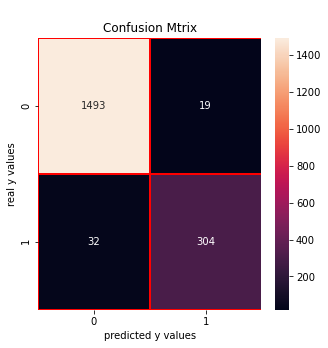

***** CatBoost Classifier  ALGORITHM:
classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.94      0.90      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.95      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  CatBoost Classifier 0.9724025974025974
NO Skill: ROC AUC=0.500
ROC AUC = 0.995


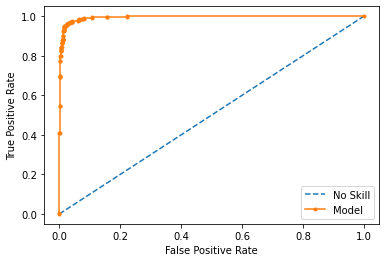

In [34]:
ML_Algorithms(CatBoostClassifier, "CatBoost Classifier", X_train, X_val, Y_train, Y_val)

In [35]:
def dictForloop(index,accuracy,recall,f1):
    dictForPlot = []
    dictForList =[]
    
    dictForPlot.append({"Model_Name":index,"ScoreType":"accuracy","Score":accuracy})
    dictForPlot.append({"Model_Name":index,"ScoreType":"Recall_Score_0","Score":recall[0]}) 
    dictForPlot.append({"Model_Name":index,"ScoreType":"Recall_Score_1","Score":recall[1]})
    dictForPlot.append({"Model_Name":index,"ScoreType":"F1_Score_0","Score":f1[0]}) 
    dictForPlot.append({"Model_Name":index,"ScoreType":"F1_Score_1","Score":f1[1]})
    
    dictForList = {"Model_Name":index,"Accuracy":accuracy,"Recall_Score_0":recall[0],
              "Recall_Score_1":recall[1],"F1_Score_0":f1[0],"F1_Score_1":f1[1]}
    
    return dictForPlot,dictForList

,Model_Name,Accuracy,Recall_Score_0,Recall_Score_1,F1_Score_0,F1_Score_1
0,Random Forest Classifier,0.956710,0.986111,0.824405,0.973873,0.873817
1,Decision Tree Classifier,0.928030,0.957672,0.794643,0.956091,0.800600
2,Gradient Boosting Classifier,0.963203,0.984788,0.866071,0.977676,0.895385
3,XGB Classifier,0.971320,0.986111,0.904762,0.982537,0.919818
4,LGBM Classifier,0.968074,0.984788,0.892857,0.980573,0.910470


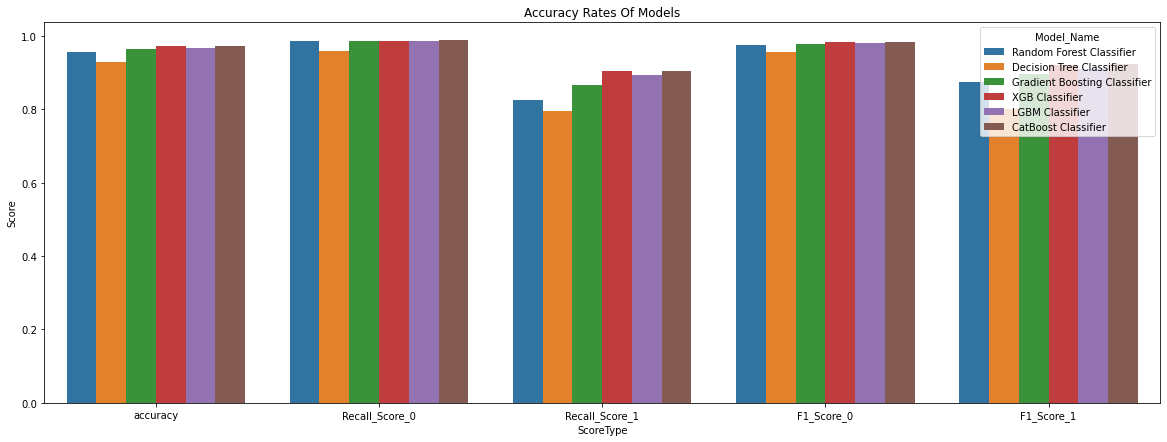

In [36]:
dictForPlot = []
dictForDf = []
for i in range(len(modelResult)):
    isim = modelName[i]
    Y_pred = modelResult[i].predict(X_val)
    
    ac = accuracy_score(Y_val, Y_pred)
    recallscore = recall_score(Y_val, Y_pred, average = None)
    f1score = f1_score(Y_val, Y_pred, average = None)
    
    szFp, szF1 = dictForloop(isim,ac,recallscore,f1score)
    dictForPlot = dictForPlot + szFp
    dictForDf.append(szF1)
    
dictPlotDf = pd.DataFrame(dictForPlot)
dictListDf = pd.DataFrame(dictForDf)

figg = plt.figure(figsize=(20,7))
plt.title('Accuracy Rates Of Models');

sns.barplot(x="ScoreType",y = "Score",hue ="Model_Name" , data = dictPlotDf);
dictListDf.head()

# Model Tuning 

## Random Forest

In [38]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_val)


print("classification_report\n",classification_report(Y_val, Y_pred))
print("Accuracy Score for ",accuracy_score(Y_val, Y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1512
           1       0.93      0.83      0.88       336

    accuracy                           0.96      1848
   macro avg       0.95      0.91      0.93      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  0.9572510822510822


In [42]:
rf = RandomForestClassifier(class_weight ="balanced")
rf_model = rf.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_val)



print("classification_report\n",classification_report(Y_val, y_pred))
print("Accuracy Score for ",accuracy_score(Y_val, Y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1512
           1       0.93      0.79      0.85       336

    accuracy                           0.95      1848
   macro avg       0.94      0.89      0.91      1848
weighted avg       0.95      0.95      0.95      1848

Accuracy Score for  0.9496753246753247


In [45]:
n_estimators = [100, 300, 500, 800, 1200, 2000]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15] 




grid_param = dict(n_estimators = n_estimators, max_depth = max_depth, 
                  min_samples_split = min_samples_split, 
                  min_samples_leaf = min_samples_leaf,
                  )

rf_tuned = GridSearchCV(rf, grid_param, cv = 5, verbose = 2, 
                      n_jobs = -1)
rf_tuned = rf_tuned.fit(X_train, Y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 62.1min
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed: 72.6min finished


In [47]:
rf_tuned.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 2000}

In [39]:
rf = RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 15, n_estimators= 2000)
rf_model = rf.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_val)



print("classification_report\n",classification_report(Y_val, Y_pred))
print("Accuracy Score for ",accuracy_score(Y_val, Y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1512
           1       0.93      0.82      0.87       336

    accuracy                           0.95      1848
   macro avg       0.94      0.90      0.92      1848
weighted avg       0.95      0.95      0.95      1848

Accuracy Score for  0.9545454545454546


In [40]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
y_probs = rf_model.predict_proba(X_val)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.35, 1, 0) # This will threshold the probabilities to give class predictions.

print("classification_report\n",classification_report(Y_val, y_pred))
print("Accuracy Score for ",accuracy_score(Y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1512
           1       0.84      0.94      0.89       336

    accuracy                           0.96      1848
   macro avg       0.92      0.95      0.93      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  0.9577922077922078


## Test with test data

In [41]:
final_model_name = []
final_model_ac = []
final_model_recall = []
final_model_f1 = []

ac = accuracy_score(Y_test, y_pred)
recallscore = recall_score(Y_test, y_pred,average=None)
f1score = f1_score(Y_test, y_pred,average=None)

In [42]:
rf = RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 15, n_estimators= 2000)
rf_model = rf.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
y_probs = rf_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.35, 1, 0) # This will threshold the probabilities to give class predictions.


ac_rf = accuracy_score(Y_test, y_pred)
recallscore_rf = recall_score(Y_test, y_pred,average=None)
f1score_rf = f1_score(Y_test, y_pred,average=None)

final_model_name.append("Random Forest")
final_model_ac.append(ac_rf)
final_model_recall.append(recallscore_rf)
final_model_f1.append(f1score_rf)


print("classification_report\n",classification_report(Y_test, y_pred))
print("Accuracy Score for ",accuracy_score(Y_test, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1526
           1       0.84      0.88      0.86       322

    accuracy                           0.95      1848
   macro avg       0.91      0.92      0.92      1848
weighted avg       0.95      0.95      0.95      1848

Accuracy Score for  0.9502164502164502


NO Skill: ROC AUC=0.500
ROC AUC = 0.982


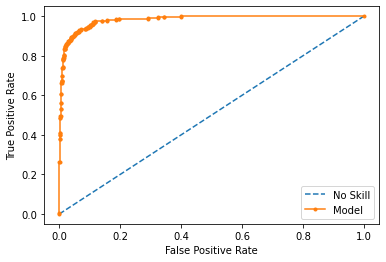

In [44]:
roc_auc_curve_plot(rf_model,X_test, Y_test)

# LGBM

In [37]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(X_train, Y_train)
y_pred = lgbm_model.predict(X_val)

print("classification_report\n",classification_report(Y_val, y_pred))
print("Accuracy Score for ",accuracy_score(Y_val, y_pred)),

classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1512
           1       0.93      0.89      0.91       336

    accuracy                           0.97      1848
   macro avg       0.95      0.94      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  0.9680735930735931


(None,)

In [42]:
lgbm_params = {'learning_rate': np.arange(0.1, 0.5,1.0),
                 'max_depth': [5,10,15,25],
                 'num_leaves': [10,20,30,40],
                 'feature_fraction': np.arange(0.0, 1.0,0.1),
                 'subsample': np.arange(0.2, 1.0, 0.1)}



lgbm_tuned = GridSearchCV(lgbm, lgbm_params, cv = 5, verbose = 2, 
                      n_jobs = -1)
lgbm_tuned = lgbm_tuned.fit(X_train, Y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1261 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 1909 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 2354 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 2881 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3488 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4177 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4946 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 5797 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed:  3.1min finished


[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001


In [43]:
lgbm_tuned.best_params_

{'feature_fraction': 0.6000000000000001,
 'learning_rate': 0.1,
 'max_depth': 5,
 'num_leaves': 40,
 'subsample': 0.2}

In [44]:
lgbm = LGBMClassifier(feature_fraction= 0.6, learning_rate= 0.1, max_depth= 5, num_leaves= 40, subsample= 0.2)
lgbm_model = lgbm.fit(X_train, Y_train)
y_pred = lgbm_model.predict(X_val)


print("classification_report\n",classification_report(Y_val, y_pred))
print("Accuracy Score for ",accuracy_score(Y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.94      0.90      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.94      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  0.9718614718614719
